# Resumo - Matplotlib

## Introdução

Matplotlib é a biblioteca "avô" de visualização de dados com o Python. Foi criado por John Hunter. Ele criou-a para tentar replicar os recursos de visualização de dados do MatLab (outro idioma de programação) no Python. Então, se você estiver familiarizado com matlab, aprender matplotlib será natural para você.

É uma excelente biblioteca de gráficos 2D e 3D para gerar figuras científicas.

Algumas das vantagens do Matplotlib são:

* Geralmente fácil de começar para plotagens simples
* Suporte para rótulos e textos personalizados
* Saída de alta qualidade em muitos formatos
* Muito personalizável em geral

Matplotlib permite que você crie figuras reprodutíveis de forma programática. Vamos aprender a usá-lo! Antes de continuar esta palestra, sugiro que você dê uma olhada  na página oficial do Matplotlib: http://matplotlib.org/

## Instalação

Você precisará primeiro instalar Matplotlib com:

    conda install matplotlib
ou
    pip install matplotlib
    
## Importação

Importe o módulo `matplotlib.pyplot` com o nome` plt`:

In [1]:
import matplotlib.pyplot as plt

Você também precisará usar essa linha para ver gráficos no notebook:

In [2]:
%matplotlib inline

Essa linha é apenas para notebooks jupyter. Se você estiver usando outro editor use: ** plt.show () ** no final de todos os seus comandos de traçado para que a figura apareça em outra janela.

### Exemplo

Vamos dar uma olhada em um exemplo muito simples usando dois arrays numpy. Você também pode usar listas, mas provavelmente você estará passando matrizes numpy ou colunas de pandas (que essencialmente também se comportam como arrays).

** Os dados que queremos plotar: **

In [2]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [3]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [4]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Comandos básicos do Matplotlib 

Podemos criar um gráfico de linha muito simples usando o seguinte:

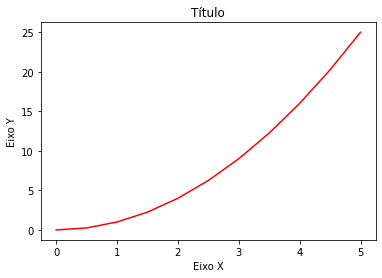

In [5]:
plt.plot(x, y, 'r') # 'r' é a cor vermelha (red)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Título')
plt.show()

## Criando Multiplots na mesma tela

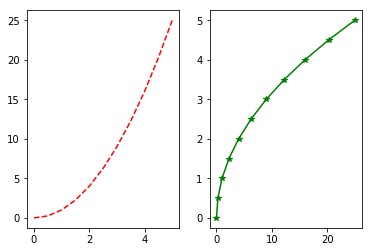

In [8]:
# plt.subplot(nlinhas, ncols, numeroplot)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # Mais nas seções de cores abaixo
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

# Matplotlib Object Oriented Method
Agora que vimos o básico, vamos acabar com uma introdução mais formal da API orientada a objetos da Matplotlib. Isso significa que vamos instanciar objetos de figuras e depois chamar métodos ou atributos desse objeto.

## Introdução ao Método Orientado a Objetos

A principal idéia ao usar o método Object Oriented mais formal é criar objetos de figura e, em seguida, apenas chamar métodos ou atributos fora desse objeto. Esta abordagem é mais agradável ao lidar com uma tela que possui vários gráficos nela.

Para começar, criamos uma figura de instância. Então, podemos adicionar eixos a essa figura:

Text(0.5, 1.0, 'Define o Título')

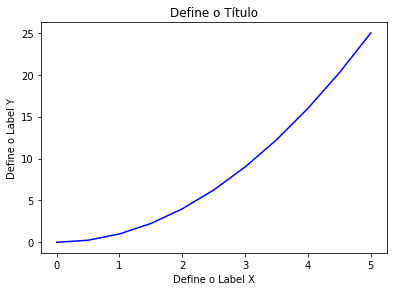

In [11]:
# Cria uma figura vazia
fig = plt.figure()

# Adiciona eixos à figura
axes = fig.add_axes([0.1, 0.1, .8, 0.8]) # esquerda, inferior, largura, altura (faixa de 0 a 1)

# Plota nos eixos especificados
axes.plot(x, y, 'b')
axes.set_xlabel('Define o Label X') # Perceba o uso de "set_" para começar métodos
axes.set_ylabel('Define o Label Y')
axes.set_title('Define o Título')

O código é um pouco mais complicado, mas a vantagem é que agora temos o controle total de onde os eixos da parcela são colocados, e podemos facilmente adicionar mais de um eixo à figura:

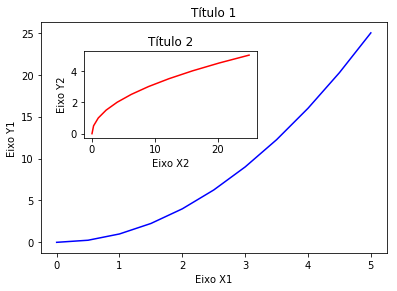

In [12]:
# Cria uma figura vazia
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Eixo principal
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # Eixos inseridos

# Trabalhando no eixo maior
axes1.plot(x, y, 'b')
axes1.set_xlabel('Eixo X1')
axes1.set_ylabel('Eixo Y1')
axes1.set_title('Título 1')

# Trabalhando no eixo menor
axes2.plot(y, x, 'r')
axes2.set_xlabel('Eixo X2')
axes2.set_ylabel('Eixo Y2')
axes2.set_title('Título 2')

## subplots()

O objeto plt.subplots () atuará como um gerenciador de eixo mais automático.

Uso básico:

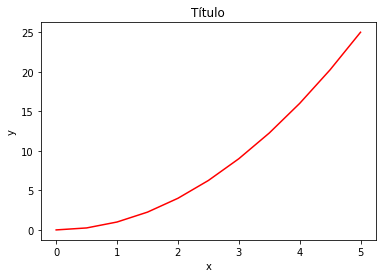

In [13]:
# Use semelhante a plt.figure (), exceto usar o desempacotamento da tupla para agarrar as figuras e os eixos
fig, axes = plt.subplots()

# Agora use o objeto dos eixos para adicionar coisas ao gráfico
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Título');

Então, você pode especificar o número de linhas e colunas ao criar o objeto subtramas ():

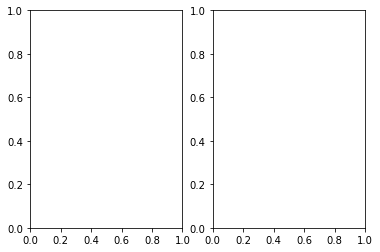

In [14]:
#Tela vazia de 1 por 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [15]:
# Eixos é uma matriz de eixos
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F521540DA0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F5215A9EF0>], dtype=object)

Podemos iterar através desta matriz:

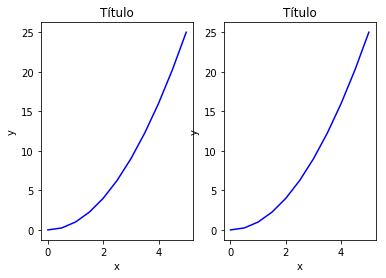

In [16]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Título')

# Mostra o objeto fig
fig

Um problema comum com matplolib é sobreposição de subplots ou figuras. Nós podemos usar o método ** fig.tight_layout () ** ou ** plt.tight_layout () **, que ajusta automaticamente as posições dos eixos na tela de figuras para que não haja conteúdo sobreposto:

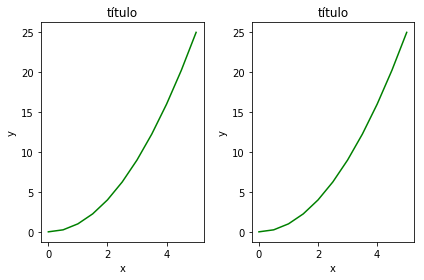

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('título')

fig    
plt.tight_layout()

### Tamanho da figura, relação de aspecto e DPI

Matplotlib permite que a relação de aspecto, DPI e o tamanho da figura sejam especificados quando o objeto Figura é criado. Você pode usar os argumentos de palavras-chave `figsize` e` dpi`.
* `figsize` é uma tupla da largura e altura da figura em polegadas
* `dpi` é o ponto por polegada (pixel por polegada).

Por exemplo:

In [18]:
fig = plt.figure(figsize=(8,4), dpi=100)

Os mesmos argumentos também podem ser passados para gerenciadores de layout, como a função `subplots ':

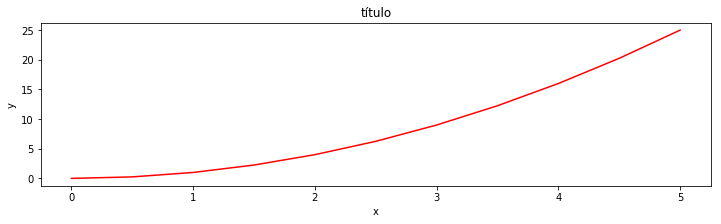

In [19]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('título');

## Salvando figuras
A Matplotlib pode gerar saída de alta qualidade em vários formatos, incluindo PNG, JPG, EPS, SVG, PGF e PDF.

Para salvar uma figura em um arquivo, podemos usar o método `savefig` da classe` Figure`:

In [68]:
fig.savefig("filename.png")

Aqui também podemos opcionalmente especificar o DPI e escolher entre diferentes formatos de saída:

In [69]:
fig.savefig("filename.png", dpi=200)

# Legends, rótulos e títulos

Agora que abordamos os conceitos básicos de como criar uma figura de tela e adicionar instâncias de eixos na tela, vejamos como decorar uma figura com títulos, rótulos de eixos e lendas.

** Títulos de Figura **

Um título pode ser adicionado a cada instância do eixo em uma figura. Para definir o título, use o método `set_title` na instância dos eixos:

In [20]:
ax.set_title("title");

** Etiquetas de eixo **

Da mesma forma, com os métodos `set_xlabel` e` set_ylabel`, podemos definir as etiquetas dos eixos X e Y:

In [21]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legendas

Você pode usar o argumento ** label = "label text" ** quando parcelas ou outros objetos são adicionados à figura e, em seguida, usando o método ** legend ** sem argumentos para adicionar a legenda à figura:

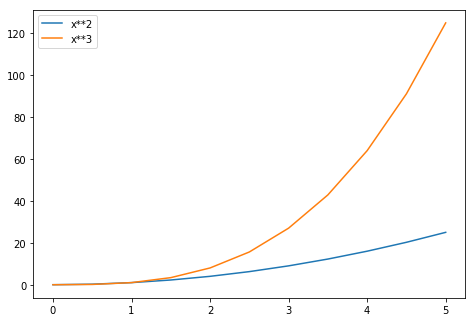

In [22]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Observe como a legenda se sobrepõe a algumas das plotagens atuais!

A função ** legend ** pega o argumento ** loc ** que pode ser usado para especificar onde na figura a lenda deve ser desenhada. Os valores permitidos de ** loc ** são códigos numéricos para os vários locais em que a lenda pode ser desenhada. Veja a [página de documentação](http://matplotlib.org/users/legend_guide.html#legend-location) para obter detalhes. Alguns dos valores mais comuns ** loc ** são:

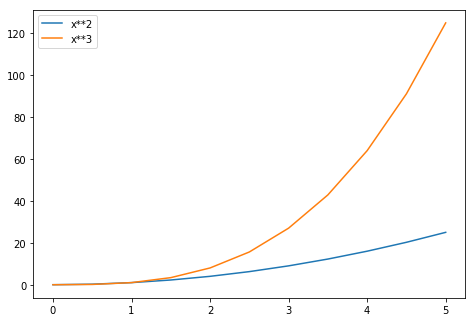

In [23]:
# Muitas opções....

ax.legend(loc=1) # Canto superior direito
ax.legend(loc=2) # Canto superior esquerdo
ax.legend(loc=3) # Canto inferior esquerdo
ax.legend(loc=4) # Canto inferior direito

# .. muitas outras opções estão disponíveis

# Mais comum para escolher
ax.legend(loc=0) # deixe matplotlib decidir a localização ideal
fig

## Configuração de cores, linhas de largura de linha, tipos de linha

Matplotlib oferece-lhe * muitas * opções para personalizar cores, largura de linha e tipos de linha.

### Cores com sintaxe semelhante ao MatLab  

Com matplotlib, podemos definir as cores das linhas e outros elementos gráficos de várias maneiras. Em primeiro lugar, podemos usar a sintaxe do tipo MATLAB onde `'b'` significa azul,`'g'` significa verde, etc. A API MATLAB para seleção de estilos de linha também é suportada: onde, por exemplo,' b. - "significa uma linha azul com pontos:

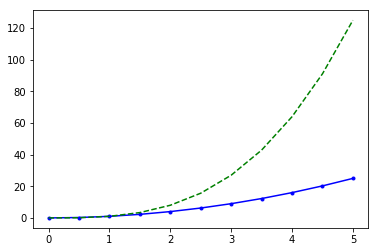

In [24]:
# Cor e estilo da linha como MATLAB
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # linha azul tracejada
ax.plot(x, x**3, 'g--') # linha verde pontilhada

### Cores com a cor = parâmetro

Nós também podemos definir cores por seus nomes ou códigos hexadecimais RGB e, opcionalmente, fornecer um valor alfa usando os argumentos de palavra "cor" e "alfa". Alpha indica opacidade.

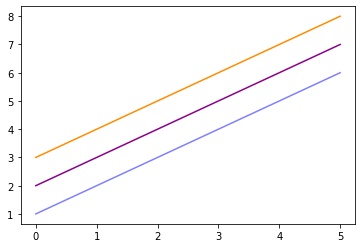

In [15]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # meio-transparente
ax.plot(x, x+2, color="#8B008B")        # RGB
ax.plot(x, x+3, color="#FF8C00")        # RGB

### Linha e estilos de marcadores

Para alterar a largura da linha, podemos usar o argumento de palavras-chave `linewidth` ou` lw`. O estilo de linha pode ser selecionado usando os argumentos de palavras-chave `linestyle` ou` ls`:

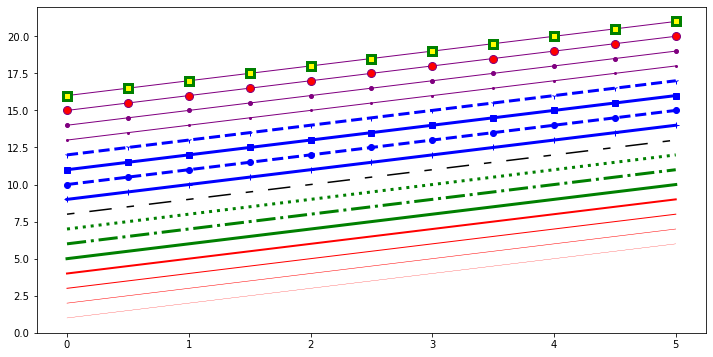

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# Possiveis estilos de linha: ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# Traços estilizados
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # Formato: comprimento da linha, comprimento do espaço, ...

# possíveis símbolos de marcador: marcador = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# tamanho e cor do marcador
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Controle sobre a aparência do eixo

Nesta seção, analisaremos o controle de propriedades de dimensionamento do eixo em uma figura matplotlib.

## Intervalo de distância

Podemos configurar os intervalos dos eixos usando os métodos `set_ylim` e` set_xlim` no objeto do eixo, ou `axis ('tight')` para obter automaticamente faixas de eixos "bem ajustados":

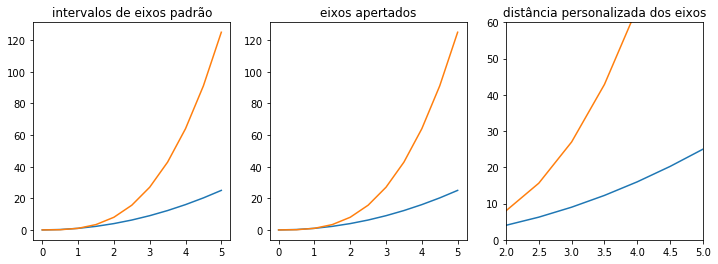

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("intervalos de eixos padrão")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("eixos apertados")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("distância personalizada dos eixos");

# Tipos de plots especiais

Existem muitas plots especiais que podemos criar, como, por exemplo, barras, histogramas, gráficos de dispersão e muito mais. A maioria desses tipos de plots, na verdade, criaremos usando seaborn, uma biblioteca de plotagem estatística para o Python. Mas aqui estão alguns exemplos desse tipo de gráficos:

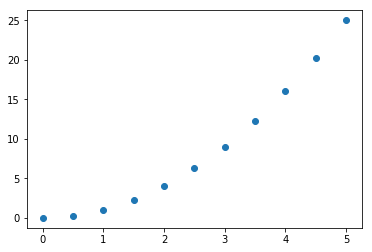

In [29]:
plt.scatter(x,y)

(array([  8.,  15.,  12.,  11.,  10.,   8.,  13.,   8.,   9.,   6.]),
 array([   5. ,  102.3,  199.6,  296.9,  394.2,  491.5,  588.8,  686.1,
         783.4,  880.7,  978. ]),
 <a list of 10 Patch objects>)

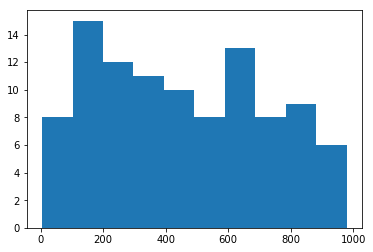

In [30]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

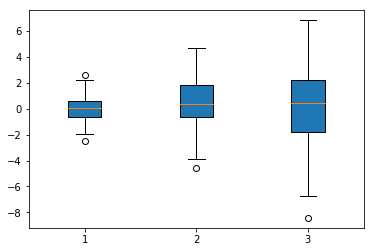

In [31]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# box plot retangular
plt.boxplot(data,vert=True,patch_artist=True);   

## Mais leituras...

* http://www.matplotlib.org - A página web do projeto matplotlib.
* https://github.com/matplotlib/matplotlib - O código fonte de matplotlib.
* http://matplotlib.org/gallery.html - Uma grande galeria mostrando diversos tipos de gráficos que Matplotlib pode criar. Altamente recomendado!
* http://www.loria.fr/~rougier/teaching/matplotlib - Um excelente tutorial sobre a biblioteca.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html -  Outra excelente referência no asssunto.
